# **IMPORTING** **DATASET**

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_excel(r'Train.xlsx')
df_val = pd.read_excel(r'Validation.xlsx')
df_test = pd.read_excel(r'Test.xlsx')
df_test['label'].value_counts()

In [ ]:
!pip install nltk

# **PRE - PROCESSING**

In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


def pre_processing(tweets):
    #punctuation removal and converting to lowercase
    punct = '''!()-[]{};:'\,<>/=?"@#$%^&*_~�'''   
    punct_removed=[]
    for sentence in tweets:
        x=""
        for letter in sentence:
            if letter not in punct:
                x=x+ letter
        punct_removed.append(x.lower())    # lowercase 
    
    #removing stopwords
    stop_words = set(stopwords.words('english'))
    #print("english stopwords are:", stop_words)
    filtered_sentences=[]
    for sentence in punct_removed:
        filtered=[]
        for word in sentence.split():
            if not word in stop_words:
                filtered.append(word)    
            
        filtered_sentences.append(filtered)
    #print(filtered_sentences) 
    
    #lemmatizing:
    vocabulary=[]
    lemmatizer=WordNetLemmatizer()
    for sentence in filtered_sentences:
        vocab=[]
        for each_word in sentence:
            vocab.append(lemmatizer.lemmatize(each_word))
        vocabulary.append(vocab) 
    #print(vocabulary)
    
    #removing non-ascii characters from words
    final_vocabulary=[]
    for each_list in vocabulary:
        list1=[]
        for each_word in each_list:
            encoded_string = each_word.encode("ascii", "ignore")
            decode_string = encoded_string.decode()
            if decode_string != '':
                list1.append(decode_string)
        final_vocabulary.append(list1) 
    #print(final_vocabulary)
    return final_vocabulary

#joining each words to sentences and storing in a list
def words_to_sentence(list_of_lists):  
    sentences= [[' '.join(i)] for i in list_of_lists]
    #print(sentences)
    return sentences

#converting the dataframe column into list for train,test and validation set
train_tweets=df_train['tweet'].tolist()
val_tweets=df_val['tweet'].tolist()
test_tweets=df_test['tweet'].tolist()

#calling the pre-processing function on all the 3 datasets
final_vocab_train= pre_processing(train_tweets)
final_vocab_val= pre_processing(val_tweets)
final_vocab_test=pre_processing(test_tweets)

#converting the word tokens back to sentences
sentences_train= words_to_sentence(final_vocab_train)
sentences_val= words_to_sentence(final_vocab_val)
sentences_test=words_to_sentence(final_vocab_test)


Train= pd.DataFrame(np.array([sentences_train]).reshape(6420,1))
Validation=  pd.DataFrame(np.array([sentences_val]).reshape(2140,1))
Test=pd.DataFrame(np.array([sentences_test]).reshape(2140,1))

Train.columns =['tweet']
Validation.columns=['tweet']
Test.columns=['tweet']

Train=Train.join(df_train['label'])
Validation=Validation.join(df_val['label'])
Test=Test.join(df_test['label'])

#print("final vocab words for train set:\n", final_vocab_train)    
#print("words back to sentences for train set:\n", sentences_train)

#print("final vocab words for val set:\n", final_vocab_val)    
#print("words back to sentences for val set:\n", sentences_val)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


-----------end of pre processing part------------

In [ ]:
Test.head()

,tweet,label
0,daily update published. state reported 734k te...,real
1,alfalfa cure covid19.,fake
2,president trump asked would catch coronavirus ...,fake
3,state reported 630 deaths. still seeing solid ...,real
4,sixth time global health emergency declared in...,real


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Train['label'] = le.fit_transform(Train['label'])
Validation['label'] = le.fit_transform(Validation['label'])
Test['label']=le.fit_transform(Test['label'])

In [ ]:
Test.head()

,tweet,label
0,daily update published. state reported 734k te...,1
1,alfalfa cure covid19.,0
2,president trump asked would catch coronavirus ...,0
3,state reported 630 deaths. still seeing solid ...,1
4,sixth time global health emergency declared in...,1


# **BASELINE MODEL**

In [ ]:
frames = [Train,Validation]

df = pd.concat(frames)

In [ ]:
df.head()
df.shape

(8560, 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
X = vectorizer.fit_transform(df['tweet'])

In [ ]:
print(vectorizer.vocabulary_)

{'currently': 8839, 'report': 13067, '99031': 2652, 'general': 10143, 'discrepancy': 9150, 'death': 8904, 'count': 7972, 'different': 9102, 'source': 13756, 'small': 13665, 'explicable': 9719, 'toll': 14336, 'stand': 13843, 'roughly': 13277, '100000': 52, 'people': 12378, 'today': 14323, 'state': 13852, '1121': 184, 'rise': 13192, 'last': 11248, 'southern': 13759, '640': 2137, 'coyasgrtt4ux': 8550, 'politically': 12572, 'correct': 7534, 'woman': 14932, 'almost': 2931, 'us': 14653, 'pandemic': 12285, 'excuse': 9681, 'reuse': 13149, 'plastic': 12477, 'bag': 3214, 'cothf8gunfpe': 7788, '1524': 503, 'covid': 8115, 'testing': 14207, 'laboratory': 11134, '25th': 1043, 'august': 3161, '2020': 800, '36827520': 1422, 'test': 14203, 'done': 9233, 'coyh3zxknnhz': 8579, 'populous': 12587, 'generate': 10145, 'large': 11245, 'case': 3682, 'look': 11409, 'new': 11873, 'per': 12381, 'million': 11642, 'smaller': 13666, 'showing': 13581, 'al': 2900, 'ar': 3067, 'id': 10564, 'la': 11129, 'co1pyw6cwras': 

In [ ]:
print(vectorizer.idf_)

[8.10906214 8.26321282 9.3618251  ... 9.3618251  8.26321282 9.3618251 ]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], 
                                                    test_size=0.30,
                                                    random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(X_train, y_train)                       # Fit Naive Bayes classifier according to X, y
pred = clf.predict(X_test)                      # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
print(classification_report(y_test, pred))

accuracy:   0.881
[[1014  204]
 [ 102 1248]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1218
           1       0.86      0.92      0.89      1350

    accuracy                           0.88      2568
   macro avg       0.88      0.88      0.88      2568
weighted avg       0.88      0.88      0.88      2568



# **Training glove embedding and using LSTM**

In [ ]:
pip install glove_python

     |████████████████████████████████| 266kB 6.0MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700270 sha256=310575d2f59758fb3f20badbab9a3962c13463685aed5a6d228131cfe155bc5c
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from glove import Corpus,Glove

In [ ]:
vocablury = final_vocab_train + final_vocab_val

In [ ]:
corpus = Corpus() 
corpus.fit(vocablury, window=5)

In [ ]:
glove = Glove(no_components=100, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=100, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Performing 100 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [ ]:
glove.add_dictionary(corpus.dictionary)

In [ ]:
glove.word_vectors[glove.dictionary['covid']]

array([ 0.33191373,  0.25734332, -0.19878437,  0.02729106,  0.21493926,
        0.88891743,  0.30951178,  0.00610365, -0.10010334, -0.41863501,
       -0.1249675 ,  0.38711715,  0.25881158, -0.24504542, -0.13772832,
       -0.29572143, -0.34915488, -0.11093084, -0.15305529, -0.50457375,
        0.11225379, -0.1609979 , -0.09755211,  0.12625368, -0.16440627,
       -0.23747897, -0.15718277,  0.41885525,  0.0599808 ,  0.31053145,
        0.2658327 , -0.00963136, -0.37898731,  0.10195334,  0.20375805,
        0.13433942, -0.50586146, -0.13404957,  0.55157667, -0.16393927,
       -0.48002359,  0.07216318, -0.4519717 ,  0.10724936, -0.67688448,
        0.14627938, -0.64559581, -0.13539918, -0.32858862,  0.07569501,
        0.54416498, -0.1571007 ,  0.16357589, -0.20054665, -0.54289185,
        0.19235277, -0.30045372, -0.58856664, -0.23491605, -0.12094143,
        0.23484502,  0.34653544, -0.14781073,  0.08907553, -0.42590307,
        0.19421022,  0.22242319,  0.14081742, -0.53293876, -0.14

In [ ]:
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
def build_bilstm(nclasses,MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    # Initialize
    model = Sequential()
    # creating embedding matrix using the embedding_dict
    embedding_matrix = np.random.random((len(glove.dictionary) + 1, EMBEDDING_DIM))
    for word, i in glove.dictionary.items():
        embedding_vector = glove.word_vectors[glove.dictionary[word]]
        if embedding_vector is not None:
            # words that are not found will be all zeroes.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
            
    # Add embedding layer
    model.add(Embedding(len(glove.dictionary) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH) )
    #add layers to model
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimzer=Adam(learning_rate=5e-5)

    # Compile the model using binary_crossentropy
    model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])
    
    return model

In [ ]:
def prepare_model_input(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index

    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    
    text = text[indices]
    print(text.shape)
    X_train_Glove = text[0:len(X_train), ]
    X_test_Glove = text[len(X_train):, ]

    return (X_train_Glove, X_test_Glove)

In [ ]:
X_train=Train['tweet']
X_test=Validation['tweet']
y_train =Train['label']
y_test=Validation['label']
X_train_Glove, X_test_Glove= prepare_model_input(X_train,X_test)
model = build_bilstm(2)
model.summary()

Found 15056 unique tokens.
(8560, 500)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          2573100   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
history = model.fit(X_train_Glove, y_train,
                           epochs=70,
                           validation_data=(X_test_Glove,y_test),
                           batch_size=128,
                           verbose=1)

Epoch 1/70
51/51 [==============================] - 117s 2s/step - loss: 0.6925 - accuracy: 0.5569 - val_loss: 0.6866 - val_accuracy: 0.7159
Epoch 2/70
51/51 [==============================] - 113s 2s/step - loss: 0.6818 - accuracy: 0.7068 - val_loss: 0.6499 - val_accuracy: 0.6963
Epoch 3/70
51/51 [==============================] - 113s 2s/step - loss: 0.6307 - accuracy: 0.7156 - val_loss: 0.5464 - val_accuracy: 0.7374
Epoch 4/70
51/51 [==============================] - 112s 2s/step - loss: 0.5448 - accuracy: 0.7361 - val_loss: 0.5229 - val_accuracy: 0.7355
Epoch 5/70
51/51 [==============================] - 113s 2s/step - loss: 0.5132 - accuracy: 0.7500 - val_loss: 0.5093 - val_accuracy: 0.7500
Epoch 6/70
51/51 [==============================] - 113s 2s/step - loss: 0.5083 - accuracy: 0.7515 - val_loss: 0.4984 - val_accuracy: 0.7556
Epoch 7/70
51/51 [==============================] - 117s 2s/step - loss: 0.4845 - accuracy: 0.7645 - val_loss: 0.4816 - val_accuracy: 0.7636
Epoch 8/70
51

In [ ]:
print("\n Evaluating Model ... \n")
predicted = model.predict_classes(X_test_Glove)
print(metrics.classification_report(y_test, predicted))


 Evaluating Model ... 



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1020
           1       0.92      0.88      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.90      0.89      2140
weighted avg       0.90      0.89      0.89      2140



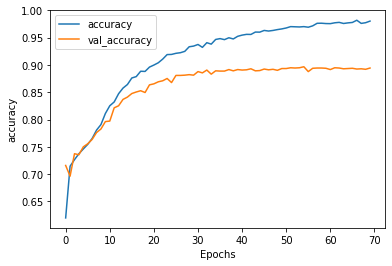

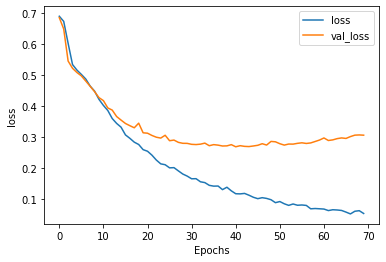

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# **Using pre-trained Glove embeddings and LSTM**

In [ ]:
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2021-07-30 20:19:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-30 20:19:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-30 20:19:25--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [ ]:
!ls
!pwdn

glove.6B.zip  sample_data
/bin/bash: pwdn: command not found


In [ ]:
def prepare_model_input(X_train, X_test,MAX_NB_WORDS=15500,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)

    print(text.shape)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index

    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])

    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train_Glove = text[0:len(X_train), ]
    X_test_Glove = text[len(X_train):, ]

    embeddings_dict = {}
    f = open("glove.6B.100d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_dict[word] = coefs
    f.close()
    
    print('Total %s word vectors.' % len(embeddings_dict))
    return (X_train_Glove, X_test_Glove, word_index, embeddings_dict)

In [ ]:
def build_bilstm(word_index, embeddings_dict, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5, hidden_layer = 3, lstm_node = 16):
    
    # Initialize a sequebtial model
    model = Sequential()

    # Make the embedding matrix using the embedding_dict
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))

    for word, i in word_index.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    # Add embedding layer
    model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH) )
    
    #add layers to model
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimzer=Adam(learning_rate=5e-5)

    # Compile the model using binart_crossentropy
    model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])
    return model

In [ ]:
X_train=Train['tweet']
X_test=Test['tweet']
y_train =Train['label']
y_test=Test['label']

X_train_Glove, X_test_Glove, word_index, embeddings_dict = prepare_model_input(X_train,X_test)
model = build_bilstm(word_index, embeddings_dict, 2)
model.summary()

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
history = model.fit(X_train_Glove, y_train,
                           epochs=100,
                           validation_data=(X_test_Glove,y_test),
                           batch_size=128,
                           verbose=1)

In [ ]:
print("\n Evaluating Model ... \n")
predicted = model.predict_classes(X_test_Glove)
print(metrics.classification_report(y_test, predicted))

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')